In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def extract_tensorboard_data(log_file, tag):
    l = []
    for e in tf.train.summary_iterator(log_file):
        for v in e.summary.value:
            if v.tag == tag:
                l.append(v.simple_value)

    return l


log_file = '/home/baudoin/pytorch-retinanet-pipeline/results/training_results/20211221-160039/events.out.tfevents.1640098839.v4rl-gpu.8248.0'
tag = 'Train_Loss/Iteration'

loss_retinanet_superpoint = extract_tensorboard_data(log_file, tag)

log_file = '/home/baudoin/pytorch-retinanet/results/training_results/20220105-095116/events.out.tfevents.1641372676.v4rl-gpu.4299.0'
tag = 'Train_Loss/Iteration'
loss_retinanet = extract_tensorboard_data(log_file, tag)

In [21]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

Text(0.5, 0, 'iteration')

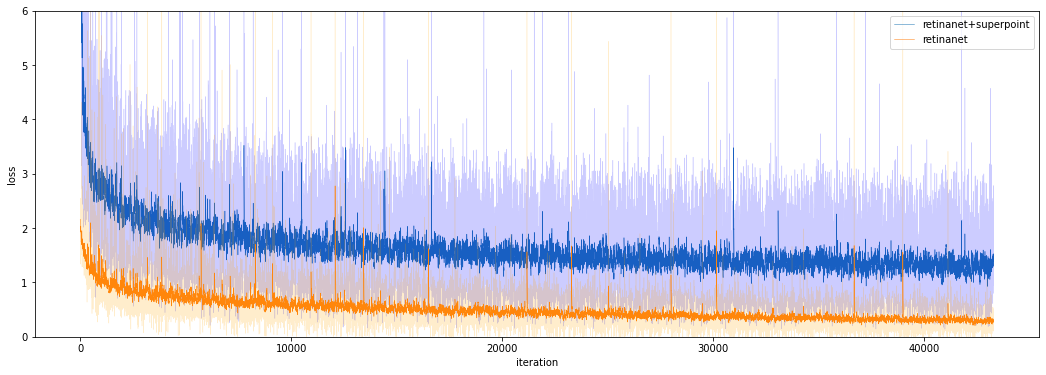

In [48]:
plt.figure(figsize=(18,6))
plt.plot(smooth(loss_retinanet_superpoint[:len(loss_retinanet)], 0.9), label='retinanet+superpoint', linewidth=0.5)
plt.plot(loss_retinanet_superpoint[:len(loss_retinanet)], alpha = 0.2, color='blue', linewidth=0.5)
plt.plot(smooth(loss_retinanet, 0.9), label='retinanet', linewidth=0.5)
plt.plot(loss_retinanet, alpha = 0.2, color='orange', linewidth=0.5)
plt.legend()
plt.ylim((0,6))
plt.ylabel('loss')
plt.xlabel('iteration')

<BarContainer object of 10 artists>

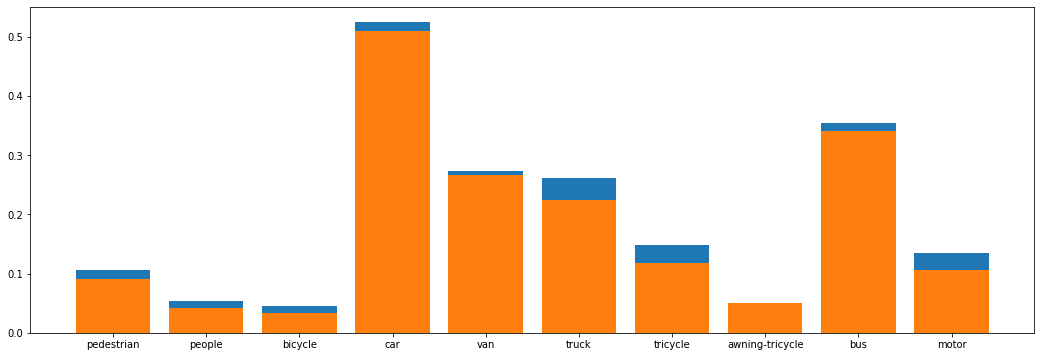

In [62]:
class_labels = ['pedestrian','people','bicycle','car','van', 'truck', 'tricycle','awning-tricycle','bus','motor']

mAP_retinanet_superpoint =[0.09107286840459378,0.04126911667788177, 0.03266346353291075, 0.5095369533832859, 0.2657046543795841, 0.22405391674606356, 0.11726151036818033, 0.05030014054614983, 0.3411728263244817, 0.1056611451620531]
mAP_retinanet = [0.1060783816806159,0.05364209761883679,0.04575904962632109,0.5245638776128224,0.27353077117554425,0.26142337396442344,0.1476122751726628,0.05101229391559008,0.3534836355385971,0.13426770684806646]

plt.figure(figsize=(18,6))

plt.bar(labels,mAP_retinanet)
plt.bar(labels,mAP_retinanet_superpoint)


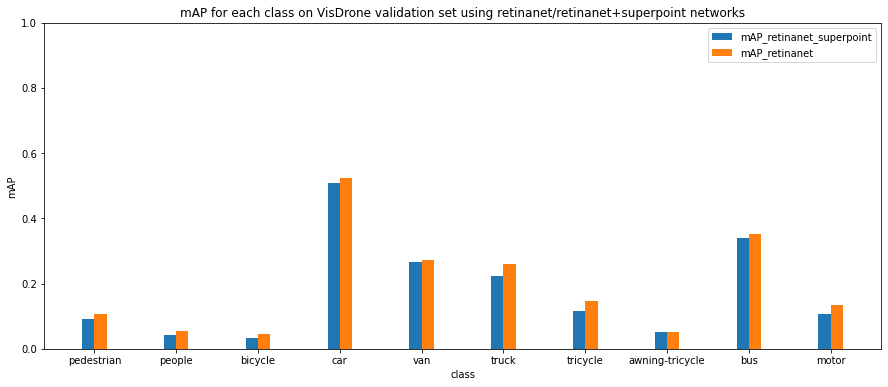

In [84]:
# Comparison baseline/superpoint using last models over 10 epochs training

import numpy as np
def subcategorybar(X, vals, labels, width=0.3):
    n = len(vals)
    _X = np.arange(len(X))
    plt.figure(figsize=(15,6))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=labels[i])   
    plt.xticks(_X, X)
    plt.legend()
    plt.ylim((0,1))
    plt.xlabel('class')
    plt.ylabel('mAP')
    plt.title('mAP for each class on VisDrone validation set using retinanet/retinanet+superpoint networks')
    plt.show()

labels=['mAP_retinanet_superpoint', 'mAP_retinanet']
subcategorybar(class_labels, [mAP_retinanet_superpoint,mAP_retinanet], labels)


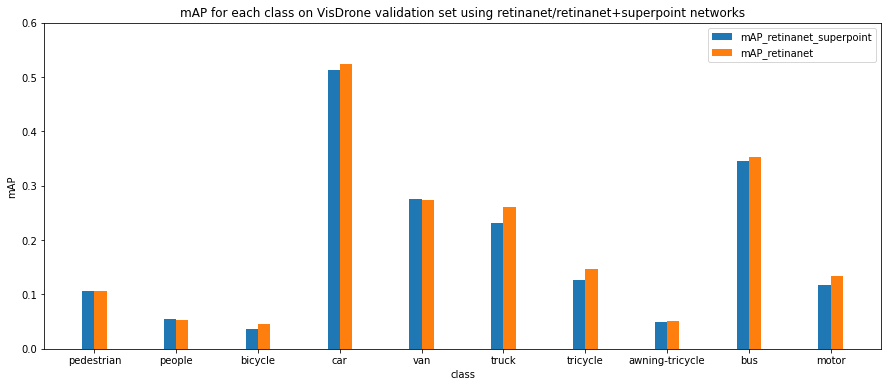

In [13]:
# Comparison baseline/superpoint using best models over 20 epochs training

import numpy as np
def subcategorybar(X, vals, labels, width=0.3):
    n = len(vals)
    _X = np.arange(len(X))
    plt.figure(figsize=(15,6))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=labels[i])   
    plt.xticks(_X, X)
    plt.legend()
    plt.ylim((0,0.6))
    plt.xlabel('class')
    plt.ylabel('mAP')
    plt.title('mAP for each class on VisDrone validation set using retinanet/retinanet+superpoint networks')
    plt.show()

class_labels = ['pedestrian','people','bicycle','car','van', 'truck', 'tricycle','awning-tricycle','bus','motor']

mAP_retinanet_superpoint_best = [0.10565774719469202, 0.0554026436251659, 0.03705378733380764, 0.5126053244144212 ,0.2751387399449972, 0.23166499592899542, 0.12637880976618981, 0.04982380642475113, 0.3462976806779955, 0.11755469440426741]
mAP_retinanet_best = [0.1060783816806159,0.05364209761883679,0.04575904962632109,0.5245638776128224,0.27353077117554425,0.26142337396442344,0.1476122751726628,0.05101229391559008,0.3534836355385971,0.13426770684806646]

labels=['mAP_retinanet_superpoint', 'mAP_retinanet']
subcategorybar(class_labels, [mAP_retinanet_superpoint_best,mAP_retinanet_best], labels)


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
path = '/home/baudoin/pytorch-retinanet-pipeline/PR_data/precision_uav.npy'

precision_visdrone = np.load('/home/baudoin/pytorch-retinanet-pipeline/PR_data/precision_visdrone.npy')
recall_visdrone = np.load('/home/baudoin/pytorch-retinanet-pipeline/PR_data/recall_visdrone.npy')

precision_uav = np.load('/home/baudoin/pytorch-retinanet-pipeline/PR_data/precision_uav.npy')
recall_uav = np.load('/home/baudoin/pytorch-retinanet-pipeline/PR_data/recall_uav.npy')

Text(0.5, 1.0, 'Precision-Recall t_teacher = 0.02, t_student = [0.1,0.3]')

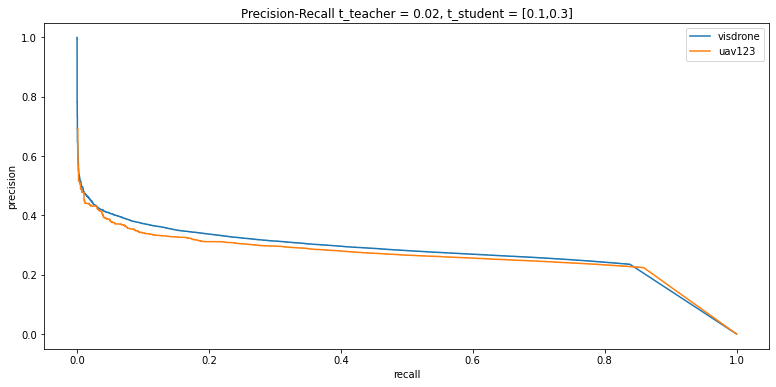

In [9]:
plt.figure(figsize=(13,6))
plt.plot(recall_visdrone, precision_visdrone, label='visdrone')
plt.plot(recall_uav, precision_uav, label = 'uav123')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.title('Precision-Recall t_teacher = 0.02, t_student = [0.1,0.3]')

Text(0.5, 1.0, 'Precision-Recall t_teacher = [0.001,0.04], t_student = [0.1,0.3]')

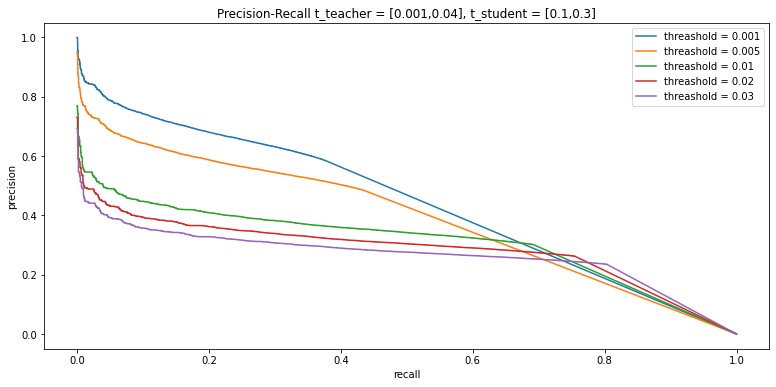

In [15]:
threashold_teacher = [0.02]

plt.figure(figsize=(13,6))
for t in threashold_teacher:
    precision = np.load('/home/baudoin/pytorch-retinanet-pipeline/PR_data/precision_uav_' +str(t)+'.npy')
    recall = np.load('/home/baudoin/pytorch-retinanet-pipeline/PR_data/recall_uav_' +str(t)+'.npy')
    plt.plot(recall, precision, label= 'threashold = ' + str(t))
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.title('Precision-Recall t_teacher = [0.02], t_student = [0.1,0.3]')

# Repeatibility and Loc Error for different models 

### Visdrone datasets

In [64]:
import numpy as np
import matplotlib.pyplot as plt

path = '/home/baudoin/pytorch-retinanet-pipeline/results/superpoint_eval_data/'

threashold_student = [0.05,0.06,0.07,0.08, 0.1, 0.12,0.14, 0.15, 0.16, 0.17, 0.18, 0.19]
rep_model_old = np.load(path + 'rep_visdrone_old_model.npy')
le_model_old = np.load(path + 'LE_visdrone_old_model.npy')

rep_model_mix = np.load(path + 'rep_visdrone_mix_model.npy')
le_model_mix = np.load(path + 'LE_visdrone_mix_model.npy')

rep_model_mix_tuned = np.load(path + 'rep_visdrone_mix_tuned_model.npy')
le_model_mix_tuned = np.load(path + 'LE_visdrone_mix_tuned_model.npy')

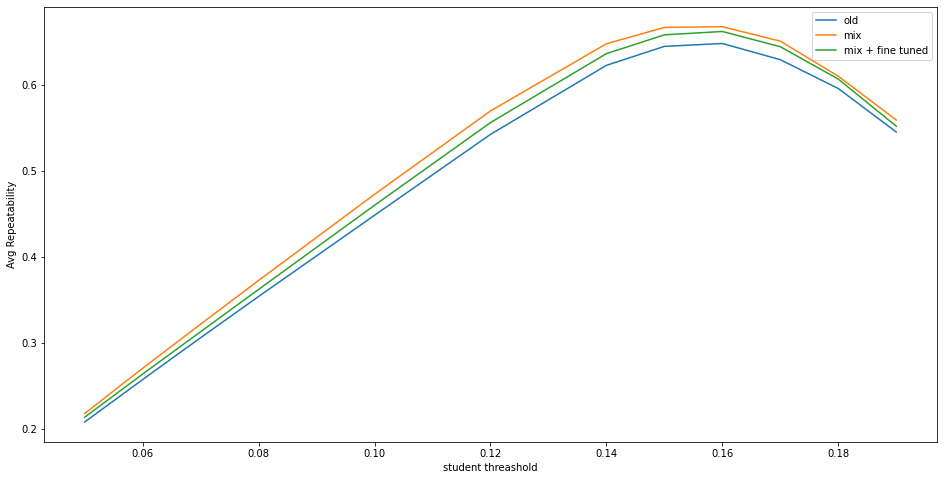

In [65]:
plt.figure(figsize=(16,8))
plt.plot(threashold_student,np.mean(rep_model_old, axis = 0), label='old')
plt.plot(threashold_student,np.mean(rep_model_mix, axis = 0), label='mix')
plt.plot(threashold_student,np.mean(rep_model_mix_tuned, axis = 0), label='mix + fine tuned')
plt.xlabel('student threashold')
plt.ylabel('Avg Repeatability')
plt.legend()

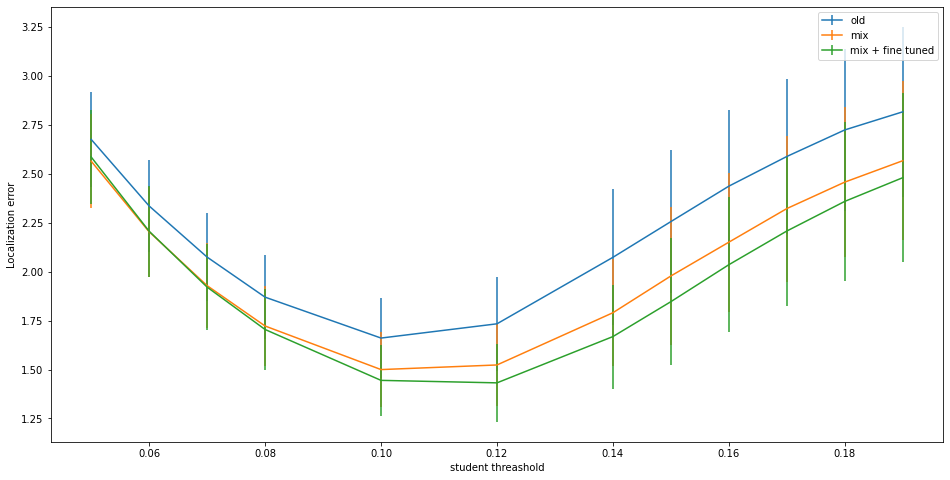

In [66]:
plt.figure(figsize=(16,8))
plt.errorbar(threashold_student, np.mean(le_model_old, axis = 0), np.std(le_model_old, axis = 0), label='old')
plt.errorbar(threashold_student, np.mean(le_model_mix, axis = 0), np.std(le_model_mix, axis = 0), label='mix')
plt.errorbar(threashold_student, np.mean(le_model_mix_tuned, axis = 0), np.std(le_model_mix_tuned, axis = 0), label='mix + fine tuned')
plt.xlabel('student threashold')
plt.ylabel('Localization error')
plt.legend()

### Synthetic shapes dataset

In [26]:
import numpy as np
import matplotlib.pyplot as plt

path = '/home/baudoin/pytorch-retinanet-pipeline/results/superpoint_eval_data/'

threashold_student = [0.05,0.06,0.07,0.08, 0.1, 0.12,0.14, 0.15, 0.16, 0.17, 0.18, 0.19]
rep_model_old = np.load(path + 'rep_synthetic_old_model.npy')
le_model_old = np.load(path + 'LE_synthetic_old_model.npy')

rep_model_mix = np.load(path + 'rep_synthetic_mix_model.npy')
le_model_mix = np.load(path + 'LE_synthetic_mix_model.npy')

rep_model_mix_tuned = np.load(path + 'rep_synthetic_mix_tuned_model.npy')
le_model_mix_tuned = np.load(path + 'LE_synthetic_mix_tuned_model.npy')

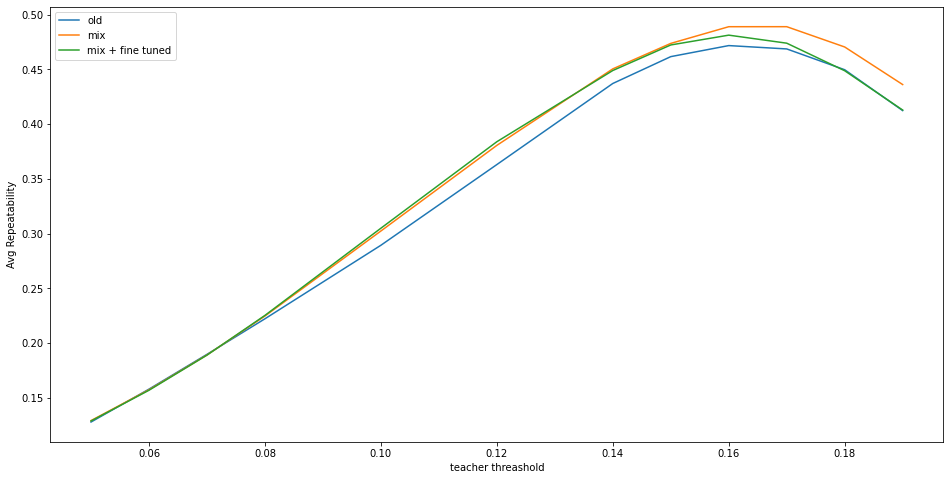

In [27]:
plt.figure(figsize=(16,8))
plt.plot(threashold_student,np.mean(rep_model_old, axis = 0), label='old')
plt.plot(threashold_student,np.mean(rep_model_mix, axis = 0), label='mix')
plt.plot(threashold_student,np.mean(rep_model_mix_tuned, axis = 0), label='mix + fine tuned')
plt.xlabel('student threashold')
plt.ylabel('Avg Repeatability')
plt.legend()

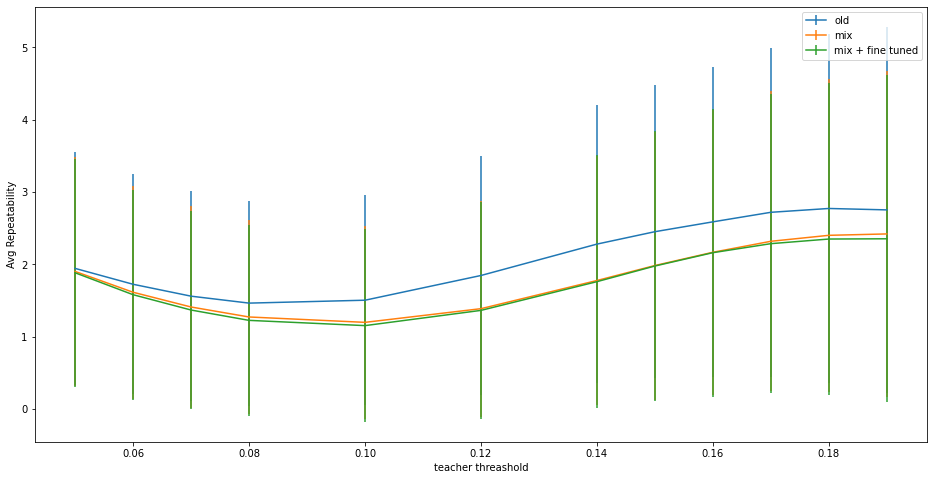

In [28]:
plt.figure(figsize=(16,8))
plt.errorbar(threashold_student, np.mean(le_model_old, axis = 0), np.std(le_model_old, axis = 0), label='old')
plt.errorbar(threashold_student, np.mean(le_model_mix, axis = 0), np.std(le_model_mix, axis = 0), label='mix')
plt.errorbar(threashold_student, np.mean(le_model_mix_tuned, axis = 0), np.std(le_model_mix_tuned, axis = 0), label='mix + fine tuned')
plt.xlabel('student threashold')
plt.ylabel('Localization Error')
plt.legend()

### Object detection Average Precision for different models on Visdrone

In [31]:
class_labels = ['pedestrian','people','bicycle','car','van', 'truck', 'tricycle','awning-tricycle','bus','motor']

mAP_retinanet_superpoint =[0.09107286840459378,0.04126911667788177, 0.03266346353291075, 0.5095369533832859, 0.2657046543795841, 0.22405391674606356, 0.11726151036818033, 0.05030014054614983, 0.3411728263244817, 0.1056611451620531]
mAP_retinanet = [0.1060783816806159,0.05364209761883679,0.04575904962632109,0.5245638776128224,0.27353077117554425,0.26142337396442344,0.1476122751726628,0.05101229391559008,0.3534836355385971,0.13426770684806646]



In [60]:
# Comparison baseline/superpoint using last models over 10 epochs training

import numpy as np
def subcategorybar(X, vals, labels, width=0.5):
    n = len(vals)
    _X = np.arange(len(X))
    plt.figure(figsize=(13,5))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=labels[i])   
    plt.xticks(_X, X)
    plt.legend()
    plt.ylim((0,0.6))
    plt.xlabel('class')
    plt.ylabel('mAP')
    plt.title('mAP for each class on VisDrone validation set')
    plt.show()

#labels=['mAP_retinanet_superpoint', 'mAP_retinanet']
#subcategorybar(class_labels, [mAP_retinanet_superpoint,mAP_retinanet], labels)


In [61]:
path = '/home/baudoin/pytorch-retinanet-pipeline/results/retinanet_eval_data/'

d = np.load(path + 'model_old.npy', allow_pickle=True).item()
mAP_retinanet_superpoint_old = [u[0] for u in d.values()]

d = np.load(path + 'model_mix.npy', allow_pickle=True).item()
mAP_retinanet_superpoint_mix = [u[0] for u in d.values()]

d = np.load(path + 'model_mix_tuned.npy', allow_pickle=True).item()
mAP_retinanet_superpoint_mix_tuned = [u[0] for u in d.values()]

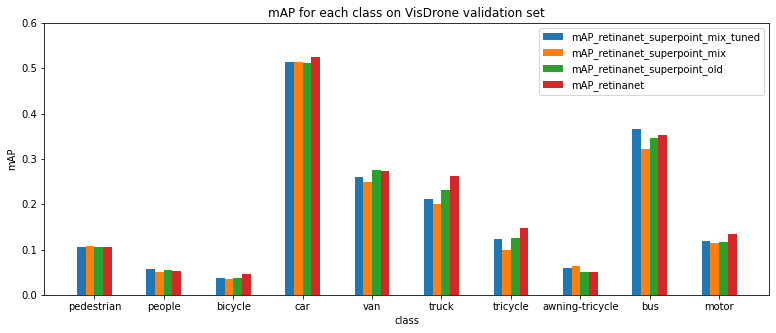

In [62]:
labels=['mAP_retinanet_superpoint_mix_tuned','mAP_retinanet_superpoint_mix','mAP_retinanet_superpoint_old', 'mAP_retinanet']
subcategorybar(class_labels, [mAP_retinanet_superpoint_mix_tuned, mAP_retinanet_superpoint_mix, mAP_retinanet_superpoint_old,mAP_retinanet], labels)

### Precision-Recall curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

path = '/home/baudoin/pytorch-retinanet-pipeline/results/superpoint_eval_data/'

precision_model_mix = np.load(path + 'precision_mix_model.npy')
recall_model_mix = np.load(path + 'recall_mix_model.npy')